In [4]:
import pandas as pd
import numpy as np
import seaborn as sn
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from math import sqrt
from sklearn.metrics import roc_auc_score, f1_score, classification_report, confusion_matrix
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error, classification_report
from keras.models import Sequential, Model 
from keras.layers import Dense, Input, concatenate, Activation, Dropout
from keras.optimizers import Adam
import tensorflow
from keras.utils import to_categorical
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from micromlgen import port

In [ ]:
def printConfusionMatrix(cm, labels, title=""):

    df_cm = pd.DataFrame(cm, labels, labels)
    sn.set(rc={'figure.figsize':(6,4)})
    sn.set(font_scale=1.4) # for label size
    ax = sn.heatmap(df_cm, annot=True, fmt='d', annot_kws={"size": 16})
    ax.set_title(title)
    ax.set(xlabel='Predicted Labels', ylabel='Real Labels')


    pyplot.show()

In [6]:
RANDOM_SEED = 42

In [7]:
np.random.seed(RANDOM_SEED)
tensorflow.random.set_seed(RANDOM_SEED)

In [ ]:
'''
with open('data/X-10-25.pkl', 'rb') as f:
    X = pickle.load(f)

with open('data/y-10-25.pkl', 'rb') as f:
    y = pickle.load(f)
    
'''

with open('data/X-1-2.pkl', 'rb') as f:
    X = pickle.load(f)

with open('data/y-1-2.pkl', 'rb') as f:
    y = pickle.load(f)
'''  '''
''' 
with open('data/X-25_50-50_25.pkl', 'rb') as f:
    X = pickle.load(f)

with open('data/y-25_50-50_25.pkl', 'rb') as f:
    y = pickle.load(f)
''' 
'''
with open('data/X-all.pkl', 'rb') as f:
    X = pickle.load(f)

with open('data/y-all.pkl', 'rb') as f:
    y = pickle.load(f)
    '''

In [ ]:
X = X[146:-13]
y = y[146:-13]

In [ ]:
X.shape

Split in train and test sets

In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=RANDOM_SEED)

NameError: name 'X' is not defined

In [3]:
#y_train = pd.get_dummies(y_train).values
#y_test = pd.get_dummies(y_test).values

In [10]:
y_train

array([0, 1, 1, ..., 1, 0, 0])

In [11]:
X_train.shape[1]

60

## Models Evaluation

### RF

In [12]:
model = RandomForestClassifier(n_estimators=50, random_state=42)
#model = MLPClassifier(random_state=42)

In [13]:
model.fit(X_train, y_train)

C:\Users\luigi.borriello2\.conda\envs\ts\lib\site-packages\sklearn\ensemble\forest.py:489: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_store_unique_indices = np.zeros(y.shape, dtype=np.int)
C:\Users\luigi.borriello2\.conda\envs\ts\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision.

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [14]:
y_pred = model.predict(X_test)

C:\Users\luigi.borriello2\.conda\envs\ts\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


In [15]:
f1_score(y_test, y_pred, average="weighted")

0.969443501342634

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       360
           1       0.96      0.97      0.97       360

    accuracy                           0.97       720
   macro avg       0.97      0.97      0.97       720
weighted avg       0.97      0.97      0.97       720



In [51]:
print(confusion_matrix(y_test, y_pred))

[[347  13]
 [  9 351]]


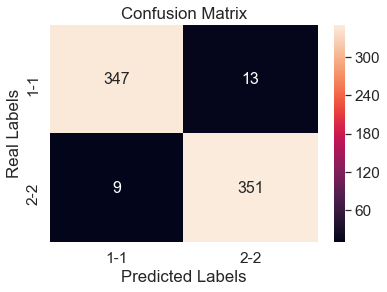

In [52]:
labels = ["1-1", "2-2"]
printConfusionMatrix(confusion_matrix(y_test, y_pred), labels, "Confusion Matrix")

In [28]:
with open('rf_model_paper_3.h', 'w') as f:  # change path if needed
    f.write(port(model, optimize=False))

In [49]:
with open('models/rf_model_paper_3.pkl', 'wb') as f:
    pickle.dump(model, f)
